# 项目：清洗与分析数据

## 数据收集

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
% matplotlib inline

#from bs4 import BeautifulSoup

收集来自本地的*平面文件*

In [2]:
twitter = pd.read_csv('twitter_archive_enhanced.csv')

收集从互联网下载的文件

In [3]:
# 下载完成后将这段代码进行注释，防止反复下载。
# url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
# response = requests.get(url)
# file_name = url.split('/')[-1]
# with open(file_name, mode='wb') as file:
#    file.write(response.content)

In [4]:
prediction = pd.read_csv('image-predictions.tsv', sep='\t')

由于无法访问Twitter，本项目直接使用课程提供的Twitter返回数据`tweet_json.txt`。每个推特的 *JSON* 数据应当写入单独一行。然后将这个 `.txt` 文件逐行读入一个 `pandas DataFrame` 中，至少包含 **tweet ID**、**retweet_count** 和 **favorite_count** 字段。

In [5]:
import json

In [6]:
tweet_list = []
with open('tweet_json.txt') as file:
    lines = file.readlines()
    for line in lines:
        line_json = json.loads(line)
        tweet_id = line_json['id_str']
        retweet_count = line_json['retweet_count']
        favorite_count = line_json['favorite_count']
        
        tweet_list.append({'tweet_id': tweet_id,
                           'retweet_count': retweet_count,
                           'favorite_count': favorite_count})
extra = pd.DataFrame(tweet_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

## 数据评估

In [7]:
pd.set_option('max_colwidth',200)

In [8]:
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [9]:
twitter.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [10]:
sum(twitter.tweet_id.duplicated())

0

In [11]:
twitter.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [12]:
sum(twitter.rating_numerator.value_counts())

2356

In [13]:
twitter.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
sum(twitter.rating_denominator.value_counts())

2356

In [15]:
twitter.iloc[2352]['text']

'This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx'

In [16]:
twitter[twitter.rating_numerator>20][['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,@markhoppus 182/10,182,10
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150


In [17]:
twitter.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Penny        10
Lola         10
Tucker       10
Bo            9
Winston       9
Sadie         8
the           8
Toby          7
an            7
Bailey        7
Buddy         7
Daisy         7
Jax           6
Oscar         6
Rusty         6
Dave          6
Stanley       6
Bella         6
Scout         6
Koda          6
Leo           6
Milo          6
Jack          6
Larry         5
           ... 
Ole           1
Bodie         1
Beemo         1
Howie         1
Vixen         1
Raphael       1
Goose         1
Andru         1
Jackie        1
Mairi         1
Mona          1
Thor          1
Tove          1
Fynn          1
Kaia          1
Malikai       1
Mollie        1
Monty         1
Holly         1
Laela         1
Jomathan      1
Godi          1
Jersey        1
Willy         1
Tilly         1
Crouton       1
Kirk          1
Dug           1
Combo         1
Norman        1
Name: name, Length: 957,

In [18]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
263,670792680469889025,https://pbs.twimg.com/media/CU8iYi2WsAEaqQ0.jpg,1,brown_bear,0.882426,False,toy_poodle,0.031355,True,miniature_poodle,0.025743,True
755,688385280030670848,https://pbs.twimg.com/media/CY2iwGNWUAI5zWi.jpg,2,golden_retriever,0.900437,True,cocker_spaniel,0.022292,True,sombrero,0.014997,False
1038,712065007010385924,https://pbs.twimg.com/media/CeHDV73W0AM5Cf8.jpg,1,goose,0.214301,False,gibbon,0.084253,False,pizza,0.080168,False
611,680115823365742593,https://pbs.twimg.com/media/CXBBurSWMAELewi.jpg,1,pug,0.999365,True,French_bulldog,0.000544,True,Boston_bull,0.000028,True


In [20]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
extra.sample(5)

,tweet_id,retweet_count,favorite_count
190,855459453768019968,8946,31563
1259,710117014656950272,2224,5975
368,828408677031882754,1468,8368
765,777621514455814149,2884,9706
440,819347104292290561,1377,7982


In [22]:
extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null object
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


**质量问题**

*twitter*
- tweet_id列值得类型为int，extra中tweet_id列的值为str（一致性问题）
- 部分行在retweeted_status_id, retweeted_status_user_id 和 retweeted_status_timestamp这三列中含有值，说明该行是转发内容（有效性问题）
- in_reply_to_status_id、in_reply_to_user_id等列含有缺失值（完整性问题）
- timestamp列的值类型为str（一致性问题）
- retweeted_status_timestamp列的值类型为str（一致性问题）
- name列中包含None、a、an、the等值（有效性问题）
- rating_denominator列和rating_numerator列中的值存在的问题（有效性问题）
  - 分子是小数，但是只提取了小数点后面的数字的情况，比如 9.75/10，提取为了 75/10
  - 多只狗狗评的总分：84/70，规律是：分母是10的N倍，且分子可以被 N 整除
  - 同一个推特中存在两处分数形式的数字，提取的是第一个，但是可能第二个才是正确的：`This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq`
  - 比较单独的错误，比如 24/7 指的是7天 24 小时，并不是一个评分

*prediction*
- tweet_id列值得类型为int，extra中tweet_id列的值为str（一致性问题）
- p1、p2、p3的值大小写不一致（一致性问题）

**整洁度问题**

*twitter*
- doggo、floofer、pupper、puppo是同一种分类变量，但是占据了四个列

*prediction*
- 该表格可以和 *twitter* 合并为一个表格

*extra*
- retweet_count、favorite_count是twitter_clean表格的一部分

## 数据清理
首先建立三个数据集的副本

In [23]:
twitter_clean = twitter.copy()
prediction_clean = prediction.copy()
extra_clean = extra.copy()

### 删除转发的数据
部分行在retweeted_status_id, retweeted_status_user_id 和 retweeted_status_timestamp这三列中含有值，说明该行是转发内容（有效性问题）

**定义**

删除在列 *retweeted_status_id*, *retweeted_status_user_id* 和 *retweeted_status_timestamp* 中有非空值的行

**代码**

In [24]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [25]:
twitter_clean = twitter_clean[twitter_clean.retweeted_status_id.isnull()]

In [26]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### 缺失数据
in_reply_to_status_id、in_reply_to_user_id等列含有缺失值（完整性问题）

**定义**

去掉大部分值为空值的列 *in_reply_to_status_id*，*in_reply_to_user_id*，*retweeted_status_id*，*retweeted_status_user_id*，*retweeted_status_timestamp*

去掉 *expanded_urls* 列中含有空值的行

**代码**

In [27]:
twitter_clean = twitter_clean.drop(['in_reply_to_status_id',
                                    'in_reply_to_user_id',
                                    'retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp'], axis=1)

In [28]:
twitter_clean = twitter_clean.dropna()

**测试**

In [29]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null object
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: int64(3), object(9)
memory usage: 215.0+ KB


### 一致性问题
*twitter*
- tweet_id列值得类型为int，extra_clean中tweet_id列的值为str
- timestamp列的值类型为str
- retweeted_status_timestamp列的值类型为str

*prediction*
- tweet_id列值得类型为int，extra_clean中tweet_id列的值为str
- p1、p2、p3的值大小写不一致

**定义**

*twitter*
- 将tweet_id列值的类型改为str
- 将timestamp列的值类型改为datetime，并分成year，month，day，hour四列，而后删除timestamp列

*prediction*
- 将tweet_id列值的类型改为str
- p1、p2、p3的值全部改为小写字母

**编码**

In [30]:
twitter_clean.tweet_id = twitter_clean.tweet_id.astype(str)
prediction_clean.tweet_id = prediction_clean.tweet_id.astype(str)
prediction_clean.p1 = prediction_clean.p1.str.lower()
prediction_clean.p2 = prediction_clean.p2.str.lower()
prediction_clean.p3 = prediction_clean.p3.str.lower()

In [31]:
twitter_clean.timestamp = pd.to_datetime(twitter_clean.timestamp)

In [32]:
twitter_clean['year'] = twitter_clean.timestamp.dt.year
twitter_clean['month'] = twitter_clean.timestamp.dt.month
twitter_clean['day'] = twitter_clean.timestamp.dt.day
twitter_clean['hour'] = twitter_clean.timestamp.dt.hour
twitter_clean.drop(['timestamp'], axis=1, inplace=True)

**测试**

In [33]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id              2117 non-null object
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
year                  2117 non-null int64
month                 2117 non-null int64
day                   2117 non-null int64
hour                  2117 non-null int64
dtypes: int64(6), object(9)
memory usage: 264.6+ KB


In [34]:
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [35]:
prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### 有效性问题
*twitter*
- name列中包含None、a、an、the等值
- rating_denominator列和rating_numerator列中的值存在的问题
  - 分子是小数，但是只提取了小数点后面的数字的情况，比如 9.75/10，提取为了 75/10
  - 多只狗狗评的总分：84/70，规律是：分母是10的N倍，且分子可以被 N 整除
  - 同一个推特中存在两处分数形式的数字，提取的是第一个，但是可能第二个才是正确的：`This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq`
  - 比较单独的错误，比如 24/7 指的是7天 24 小时，并不是一个评分

**定义**

*twitter*
- name列中的None、a、an、the等值替换为Unnamed
- rating_denominator列和rating_numerator列中的值存在的问题
  - 重新提取推文中正确的评分
  - 将多只狗狗评的总分重新计算为分母为 10 的形式
  - 去掉含有错误评分的行

**编码**

In [36]:
twitter_clean['score'] = twitter_clean['text'].str.findall(r'((\d+(\.\d+)?)\/\d+)')

In [37]:
twitter_clean['score'] = twitter_clean.score.apply(lambda x: x[-1][0])

In [38]:
twitter_clean.loc[[433,695,988]][['text','score','rating_numerator','rating_denominator']]

,text,score,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84/70,84,70
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75/10,75,10
988,What jokester sent in a pic without a dog in it? This is not @rock_rates. This is @dog_rates. Thank you ...10/10 https://t.co/nDPaYHrtNX,10/10,10,10


In [39]:
twitter_clean.rating_numerator = twitter_clean.score.apply(lambda x: float(x.split('/')[0]))
twitter_clean.rating_denominator = twitter_clean.score.apply(lambda x: float(x.split('/')[1]))

In [40]:
twitter_clean = twitter_clean[twitter_clean.rating_denominator%10==0]

In [41]:
twitter_clean.rating_numerator = twitter_clean.rating_numerator/twitter_clean.rating_denominator*10
twitter_clean.rating_denominator = 10

In [42]:
twitter_clean = twitter_clean[twitter_clean.rating_numerator<20]

In [43]:
twitter_clean.drop(['score'], axis=1, inplace=True)

In [44]:
error_list = ['None', 'a', 'an', 'the']
for word in error_list:
    twitter_clean.name.replace(word, 'Unnamed', inplace=True)

**测试**

In [45]:
twitter_clean.name.value_counts()

Unnamed       690
Lucy           11
Charlie        11
Oliver         10
Cooper         10
Penny           9
Tucker          9
Lola            8
Winston         8
Sadie           8
Toby            7
Daisy           7
Oscar           6
Bella           6
Jax             6
Bailey          6
Stanley         6
Bo              6
Koda            6
Chester         5
Leo             5
Dave            5
Rusty           5
Louis           5
Bentley         5
Scout           5
Buddy           5
Milo            5
Finn            4
Jeffrey         4
             ... 
Grizzwald       1
Sully           1
Callie          1
Dante           1
Tilly           1
Jersey          1
Maisey          1
Harper          1
Brutus          1
Bowie           1
Longfellow      1
Kenny           1
Puff            1
Oddie           1
Batdog          1
Kanu            1
Andru           1
Mairi           1
Mona            1
Thor            1
Tove            1
Fynn            1
Kaia            1
Malikai         1
Monty     

In [46]:
twitter_clean.rating_denominator.value_counts()

10    2114
Name: rating_denominator, dtype: int64

In [47]:
twitter_clean.rating_numerator.value_counts()

12.00    493
10.00    430
11.00    424
13.00    297
9.00     154
8.00     101
7.00      53
14.00     41
6.00      33
5.00      32
3.00      19
4.00      16
2.00      10
1.00       5
0.00       2
9.75       1
13.50      1
11.27      1
11.26      1
Name: rating_numerator, dtype: int64

In [48]:
twitter_clean[twitter_clean.rating_numerator>20]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day,hour


In [49]:
twitter_clean[twitter_clean.rating_denominator!=10]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day,hour


### 整洁度问题

*twitter*
- doggo、floofer、pupper、puppo是同一种分类变量，但是占据了四个列

*prediction*
- 该表格可以和 *twitter* 合并为一个表格

*extra*
- retweet_count、favorite_count是twitter_clean表格的一部分

**定义**
- 将doggo、floofer、pupper、puppo作为分类变量放入一列，列名称为level，没有定义狗“地位”的赋值Nolevel，有多个“地位”的狗赋值Mulitple
- 将 prediction 和 extra 合并到 twitter 中

**编码**

In [50]:
twitter_clean.doggo = twitter_clean.doggo.apply(lambda x: '' if x=='None' else x)
twitter_clean.floofer = twitter_clean.floofer.apply(lambda x: '' if x=='None' else x)
twitter_clean.pupper = twitter_clean.pupper.apply(lambda x: '' if x=='None' else x)
twitter_clean.puppo = twitter_clean.puppo.apply(lambda x: '' if x=='None' else x)

In [51]:
twitter_clean['level'] = twitter_clean.doggo + twitter_clean.floofer + twitter_clean.pupper + twitter_clean.puppo

In [52]:
twitter_clean.level = twitter_clean.level.apply(lambda x: str.strip(x))

In [53]:
twitter_clean.level = twitter_clean.level.apply(lambda x: 'Nolevel' if len(x)<1 else ('Multiple' if len(x)>7 else x))

In [54]:
twitter_clean.level.value_counts()

Nolevel     1776
pupper       222
doggo         72
puppo         23
Multiple      12
floofer        9
Name: level, dtype: int64

In [55]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2114 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id              2114 non-null object
source                2114 non-null object
text                  2114 non-null object
expanded_urls         2114 non-null object
rating_numerator      2114 non-null float64
rating_denominator    2114 non-null int64
name                  2114 non-null object
doggo                 2114 non-null object
floofer               2114 non-null object
pupper                2114 non-null object
puppo                 2114 non-null object
year                  2114 non-null int64
month                 2114 non-null int64
day                   2114 non-null int64
hour                  2114 non-null int64
level                 2114 non-null object
dtypes: float64(1), int64(5), object(10)
memory usage: 280.8+ KB


In [56]:
twitter_clean = pd.merge(twitter_clean, extra_clean, on=['tweet_id'], how='inner')
twitter_clean.dropna(inplace=True)

In [57]:
twitter_clean = pd.merge(twitter_clean, prediction_clean, on=['tweet_id'], how='inner')
twitter_clean.dropna(inplace=True)

In [58]:
twitter_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

**测试**

In [59]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1990
Data columns (total 25 columns):
tweet_id              1991 non-null object
source                1991 non-null object
text                  1991 non-null object
expanded_urls         1991 non-null object
rating_numerator      1991 non-null float64
rating_denominator    1991 non-null int64
name                  1991 non-null object
year                  1991 non-null int64
month                 1991 non-null int64
day                   1991 non-null int64
hour                  1991 non-null int64
level                 1991 non-null object
retweet_count         1991 non-null int64
favorite_count        1991 non-null int64
jpg_url               1991 non-null object
img_num               1991 non-null int64
p1                    1991 non-null object
p1_conf               1991 non-null float64
p1_dog                1991 non-null bool
p2                    1991 non-null object
p2_conf               1991 non-null float

In [60]:
twitter_clean.sample(10)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,day,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1965,666362758909284353,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Unique dog here. Very small. Lives in container of Frosted Flakes (?). Short legs. Must be rare 6/10 would still pet https://t.co/XMD9CwjEnM,https://twitter.com/dog_rates/status/666362758909284353/photo/1,6.0,10,Unnamed,2015,11,16,...,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
1908,667491009379606528,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,https://twitter.com/dog_rates/status/667491009379606528/photo/1,8.0,10,Unnamed,2015,11,19,...,1,borzoi,0.852088,True,ice_bear,0.132264,False,weasel,0.005730,False
650,759846353224826880,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kirby. He's a Beneblip Cumberpat. Pretty heckin rare. 11/10 would put my face against his face https://t.co/fd6uucghY6,https://twitter.com/dog_rates/status/759846353224826880/photo/1,11.0,10,Kirby,2016,7,31,...,1,sussex_spaniel,0.355395,True,vizsla,0.141094,True,otterhound,0.092198,True
722,750026558547456000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",Meet Jax &amp; Jil. Jil is yelling the pledge of allegiance. If u cant take the freedom get out the kitchen Jax. 10/10s https://t.co/jrg29NDNhI,https://twitter.com/dog_rates/status/750026558547456000/photo/1,10.0,10,Jax,2016,7,4,...,1,standard_poodle,0.258732,True,teddy,0.130760,False,toy_poodle,0.071726,True
1974,666102155909144576,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq,https://twitter.com/dog_rates/status/666102155909144576/photo/1,11.0,10,Unnamed,2015,11,16,...,1,english_setter,0.298617,True,newfoundland,0.149842,True,borzoi,0.133649,True
1213,689977555533848577,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Wednesday here's a pup wearing a beret. 12/10 please enjoy https://t.co/MXedEzSHIf,https://twitter.com/dog_rates/status/689977555533848577/photo/1,12.0,10,Unnamed,2016,1,21,...,1,cowboy_hat,0.291081,False,labrador_retriever,0.179625,True,sombrero,0.121493,False
1593,673688752737402881,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Larry. He doesn't know how to shoe. 9/10 damn it Larry https://t.co/jMki5GOV3y,https://twitter.com/dog_rates/status/673688752737402881/photo/1,9.0,10,Larry,2015,12,7,...,1,soft-coated_wheaten_terrier,0.340806,True,sealyham_terrier,0.234898,True,kuvasz,0.203495,True
652,759557299618865152,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Emma. She can't believe her last guess didn't hit. Convinced ur stacking them on top of each other. 10/10 https://t.co/JRV1dhBYwu,"https://twitter.com/dog_rates/status/759557299618865152/photo/1,https://twitter.com/dog_rates/status/759557299618865152/photo/1,https://twitter.com/dog_rates/status/759557299618865152/photo/1",10.0,10,Emma,2016,7,31,...,2,golden_retriever,0.763333,True,chesapeake_bay_retriever,0.194251,True,labrador_retriever,0.012225,True
1950,666691418707132416,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Christoper. He is a spotted Penne. Can easily navigate stairs. 8/10 https://t.co/bg4TqvvkuF,https://twitter.com/dog_rates/status/666691418707132416/photo/1,8.0,10,Christoper,2015,11,17,...,1,german_shepherd,0.975401,True,beagle,0.008687,True,bloodhound,0.005394,True
1802,669393256313184256,"<a href=""http://twit

## 保存清理后的数据

In [61]:
twitter_clean.to_csv('twitter_archive_master.csv', index=False)

## 数据分析和可视化

In [62]:
df = pd.read_csv('twitter_archive_master.csv')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 25 columns):
tweet_id              1991 non-null int64
source                1991 non-null object
text                  1991 non-null object
expanded_urls         1991 non-null object
rating_numerator      1991 non-null float64
rating_denominator    1991 non-null int64
name                  1991 non-null object
year                  1991 non-null int64
month                 1991 non-null int64
day                   1991 non-null int64
hour                  1991 non-null int64
level                 1991 non-null object
retweet_count         1991 non-null int64
favorite_count        1991 non-null int64
jpg_url               1991 non-null object
img_num               1991 non-null int64
p1                    1991 non-null object
p1_conf               1991 non-null float64
p1_dog                1991 non-null bool
p2                    1991 non-null object
p2_conf               1991 non-null float6

In [64]:
df.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,day,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,2017,8,1,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,2017,8,1,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,2017,7,31,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,2017,7,30,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,2017,7,29,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


**分析四个问题**
- 哪个品种的狗评分最高，转发数和点赞数更多(取前五名)
- 哪个品种的狗出现的频率最高(取前五名)
- 有名字的狗和没有被命名的狗，哪一类的转发数和点赞数更多
- 哪一个时间段twitter的活跃度更高（取前五名）

### 问题一：哪个品种的狗评分最高，转发数和点赞数更多(取前五名)

In [65]:
breed_score = df[df.p1_dog==True]

In [66]:
breed_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1476 entries, 1 to 1990
Data columns (total 25 columns):
tweet_id              1476 non-null int64
source                1476 non-null object
text                  1476 non-null object
expanded_urls         1476 non-null object
rating_numerator      1476 non-null float64
rating_denominator    1476 non-null int64
name                  1476 non-null object
year                  1476 non-null int64
month                 1476 non-null int64
day                   1476 non-null int64
hour                  1476 non-null int64
level                 1476 non-null object
retweet_count         1476 non-null int64
favorite_count        1476 non-null int64
jpg_url               1476 non-null object
img_num               1476 non-null int64
p1                    1476 non-null object
p1_conf               1476 non-null float64
p1_dog                1476 non-null bool
p2                    1476 non-null object
p2_conf               1476 non-null float6

In [67]:
rating_score = breed_score.groupby(['p1'])['rating_numerator'].mean()

In [68]:
rating_top5 = rating_score.sort_values(ascending=False).head(7)
rating_top5

p1
saluki                12.500000
briard                12.333333
tibetan_mastiff       12.250000
border_terrier        12.142857
silky_terrier         12.000000
giant_schnauzer       12.000000
standard_schnauzer    12.000000
Name: rating_numerator, dtype: float64

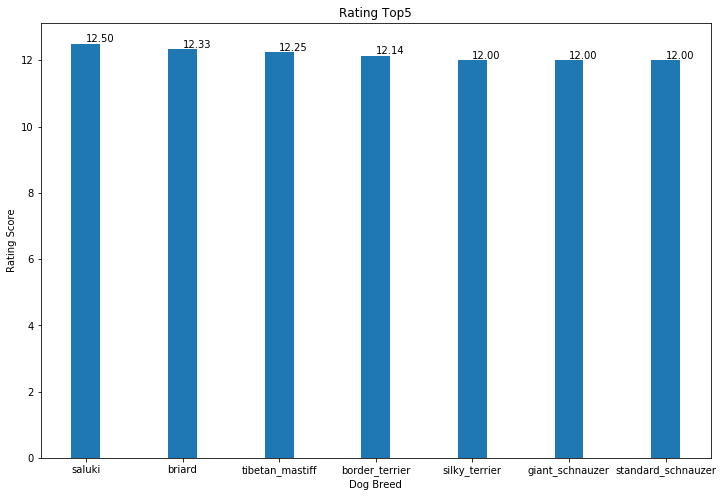

In [69]:
plt.figure(figsize=(12, 8))
plt.title("Rating Top5")
plt.xlabel('Dog Breed')
plt.ylabel('Rating Score')
X = rating_top5.index.values
Y = rating_top5.values
plt.bar(X, Y, width=0.3)
for i,(x,y) in enumerate(zip(X, Y)):
    plt.text(x, y+0.05, "%.2f" %y)

评分最高的前5名分别是：
- 第一名 saluki，12.50分
- 第二名 briard，12.33分
- 第三名 tibetan_mastiff，12.25分
- 第四名 border_terrier，12.14分        
- 并列第五名 giant_schnauzer、silky_terrier、standard_schnauzer，12分

In [70]:
retweet_score = breed_score.groupby(['p1'])['retweet_count'].sum()
retweet_top5 = retweet_score.sort_values(ascending=False).head()
retweet_top5

p1
golden_retriever      503506
labrador_retriever    364632
pembroke              278975
chihuahua             219521
samoyed               183897
Name: retweet_count, dtype: int64

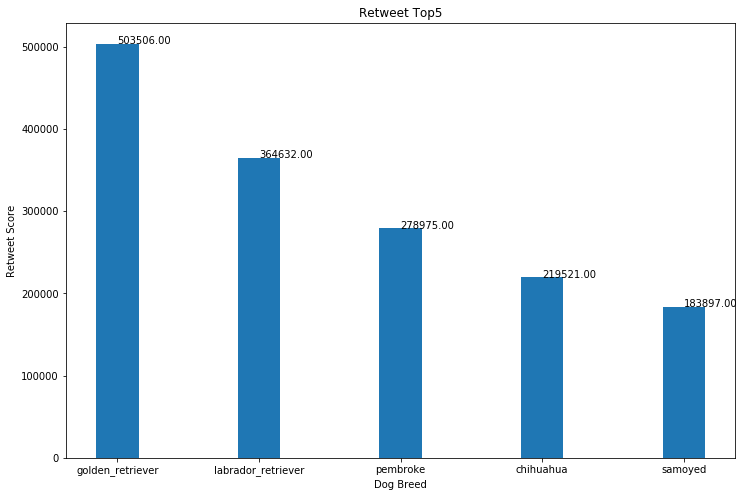

In [71]:
plt.figure(figsize=(12, 8))
plt.title("Retweet Top5")
plt.xlabel('Dog Breed')
plt.ylabel('Retweet Score')
X = retweet_top5.index.values
Y = retweet_top5.values
plt.bar(X, Y, width=0.3)
for i,(x,y) in enumerate(zip(X, Y)):
    plt.text(x, y+0.5, "%.2f" %y)

转发数最高的前5名分别是：
- 第一名 golden_retriever，503506
- 第二名 labrador_retriever，364632
- 第三名 pembroke，278975
- 第四名 chihuahua，219521
- 第五名 samoyed，183897

In [72]:
favorite_score = breed_score.groupby(['p1'])['favorite_count'].sum()
favorite_top5 = favorite_score.sort_values(ascending=False).head()
favorite_top5

p1
golden_retriever      1701430
labrador_retriever    1119555
pembroke               991762
chihuahua              673987
samoyed                541345
Name: favorite_count, dtype: int64

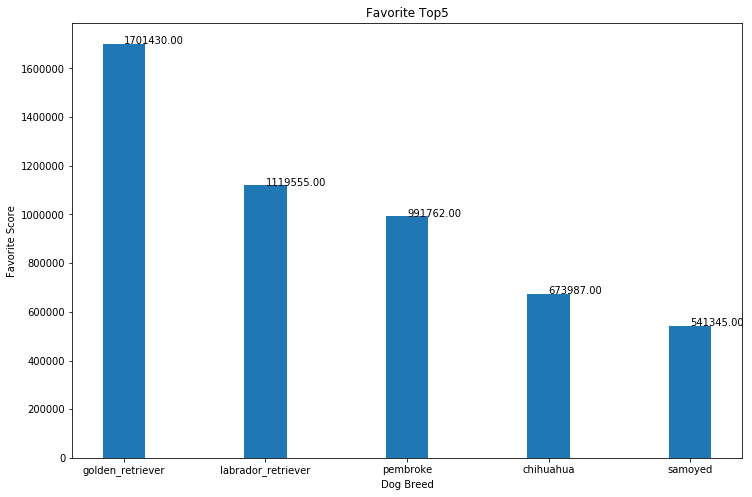

In [73]:
plt.figure(figsize=(12, 8))
plt.title("Favorite Top5")
plt.xlabel('Dog Breed')
plt.ylabel('Favorite Score')
X = favorite_top5.index.values
Y = favorite_top5.values
plt.bar(X, Y, width=0.3)
for i,(x,y) in enumerate(zip(X, Y)):
    plt.text(x, y+0.5, "%.2f" %y)

点赞数最高的前5名分别是：
- 第一名 golden_retriever，1701430
- 第二名 labrador_retriever，1119555
- 第三名 pembroke，991762
- 第四名 chihuahua，673987
- 第五名 samoyed，541345

### 问题二：哪个品种的狗出现的频率最高

In [74]:
breed_score.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,day,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,2017,8,1,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,2017,7,31,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,2017,7,29,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
5,891087950875897856,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10,Unnamed,2017,7,29,...,1,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False
6,890971913173991426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10,Jax,2017,7,28,...,1,appenzeller,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False


In [75]:
fashion_top5 = breed_score.groupby(['p1'])['tweet_id'].count().sort_values(ascending=False).head(5)
fashion_top5

p1
golden_retriever      138
labrador_retriever     95
pembroke               88
chihuahua              79
pug                    54
Name: tweet_id, dtype: int64

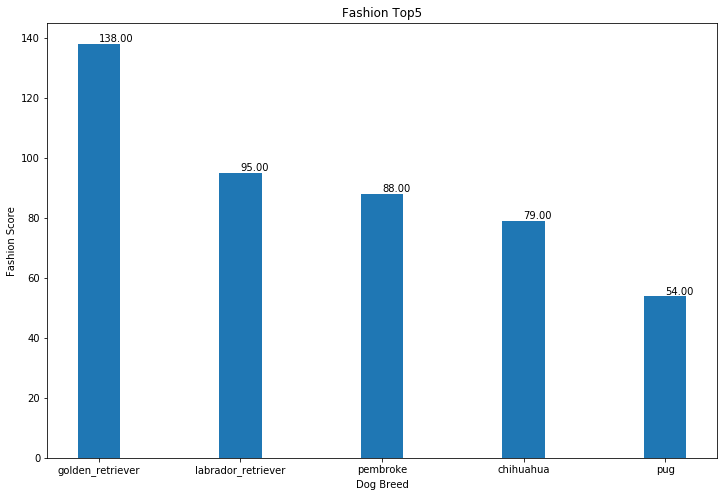

In [76]:
plt.figure(figsize=(12, 8))
plt.title("Fashion Top5")
plt.xlabel('Dog Breed')
plt.ylabel('Fashion Score')
X = fashion_top5.index.values
Y = fashion_top5.values
plt.bar(X, Y, width=0.3)
for i,(x,y) in enumerate(zip(X, Y)):
    plt.text(x, y+0.5, "%.2f" %y)

出现频率最高的前5名分别是：
- 第一名 golden_retriever，138
- 第二名 labrador_retriever，95
- 第三名 pembroke，88
- 第四名 chihuahua，79
- 第五名 pug，54

### 问题三：有名字的狗和没有被命名的狗，哪一类的转发数和点赞数更多

In [77]:
breed_score['name'] = breed_score['name'].apply(lambda x: 'Named' if x!='Unnamed' else x)

/anaconda3/envs/dlnd/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [78]:
table1 = breed_score.groupby(['name'])[['retweet_count','favorite_count']].sum()
table1

,retweet_count,favorite_count
name,,
Named,2972681,10378237
Unnamed,1142092,3345189


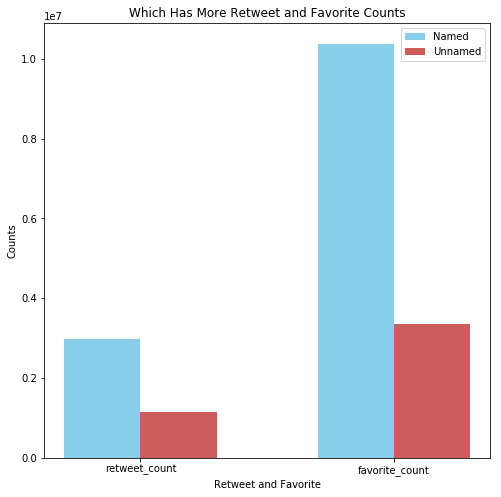

In [79]:
plt.figure(figsize=(8,8))
plt.title('Which Has More Retweet and Favorite Counts')
plt.xlabel('Retweet and Favorite')
plt.ylabel('Counts')

name_list = table1.columns.tolist()
named = table1.loc['Named'].values
unnamed = table1.loc['Unnamed'].values
ind = np.arange(len(named))  # the x locations for the groups
width = 0.3  # the width of the bars

plt.bar(ind-width/2, named, width, color='SkyBlue', label='Named')
plt.bar(ind+width/2, unnamed, width, color='IndianRed', label='Unnamed')
plt.xticks(ind, name_list)
plt.legend()

有名字的狗的转发数和点赞数都要高于没有名字的狗。

### 问题四：一天中哪一个时间段twitter的活跃度更高（取前五名）

In [80]:
activity_hour = twitter_clean.groupby(['hour'])['tweet_id'].count().sort_values(ascending=False).head()
activity_hour

hour
1     278
0     253
2     210
16    194
3     170
Name: tweet_id, dtype: int64

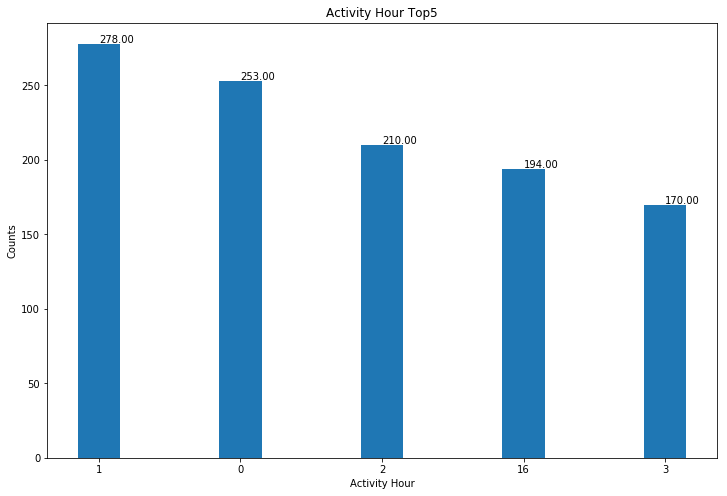

In [81]:
plt.figure(figsize=(12, 8))
plt.title("Activity Hour Top5")
plt.xlabel('Activity Hour')
plt.ylabel('Counts')
X = activity_hour.index.values.astype(str)
Y = activity_hour.values
plt.bar(X, Y, width=0.3)
for i,(x,y) in enumerate(zip(X, Y)):
    plt.text(x, y+0.5, "%.2f" %y)

一天中用户活跃度最高的时间的前五名分别是：
- 1:00，278
- 0:00，253
- 2:00，210
- 16:00，194
- 3:00，170

In [82]:
table_named = breed_score[breed_score.name=='Named']
table_unnamed = breed_score[breed_score.name=='Unnamed']

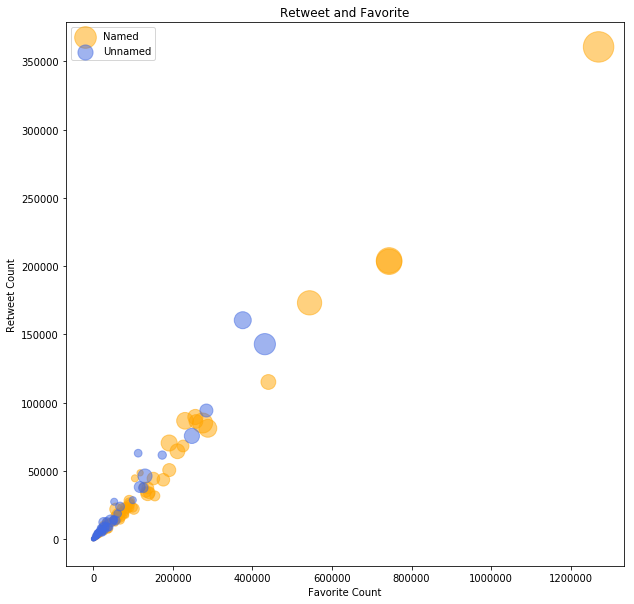

In [83]:
plt.figure(figsize=(10,10))
plt.title('Retweet and Favorite')
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')

x_named = table_named.groupby(['p1'])['favorite_count'].sum()
y_named = table_named.groupby(['p1'])['retweet_count'].sum()
area_named = table_named.groupby(['p1'])['tweet_id'].count()*10
plt.scatter(x_named, y_named, s=area_named, c='orange', alpha=0.5, label='Named')

x_unnamed = table_unnamed.groupby(['p1'])['favorite_count'].sum()
y_unnamed = table_unnamed.groupby(['p1'])['retweet_count'].sum()
area_unnamed = table_unnamed.groupby(['p1'])['tweet_id'].count()*10
plt.scatter(x_unnamed, y_unnamed, s=area_unnamed, c='royalblue', alpha=0.5, label='Unnamed')

plt.legend()

通过上图能够看出
- 点赞数和转发数大体上呈正相关趋势。
- 圆圈的大小代表出现的次数。出现次数较多的狗，favorite和retweet值也相应增加。
- 从分布上看，未命名的狗点赞数和转发数要少于有名字的狗。其中一个原因可能是有名字的狗受到的照料要好于未命名的狗，外观上可能更容易引人喜欢。